In this notebook, I plot results on football pitch

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

import json
import numpy as np

In [4]:
%matplotlib inline

In [5]:
result_file = "pred_results/results.json"
results = []
with open(result_file) as f:
    for l in f:
        results.append(json.loads(l))

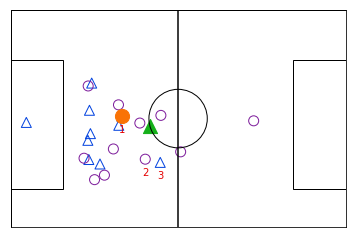

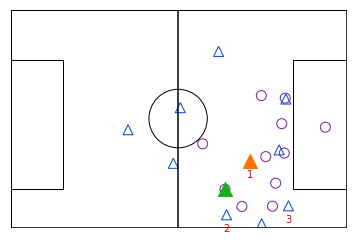

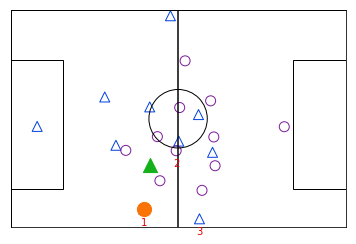

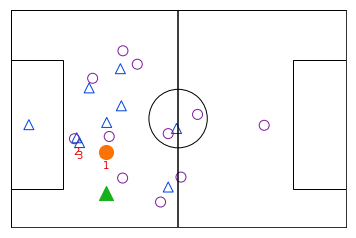

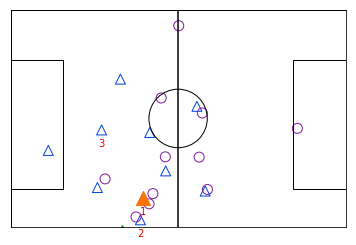

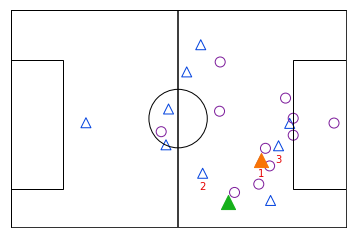

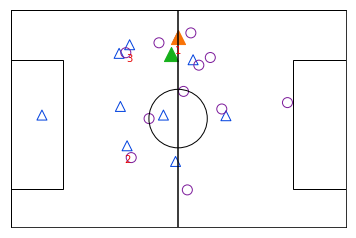

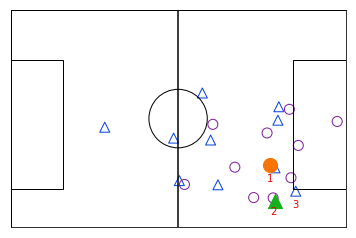

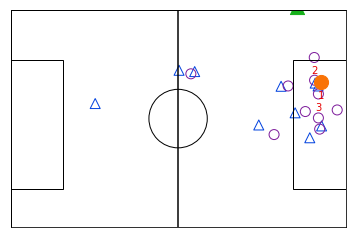

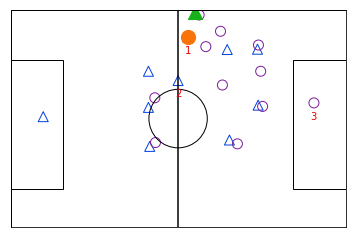

In [8]:
nb_results = 10
for res_nb in np.random.choice(range(0, len(results)), nb_results):
    res = results[res_nb]
    
    player_ids = res["predictions"]
    friendly_indices = list(range(1,15)) if res["sender_id"] < 15 else list(range(15, 29))
    
    friendly_x_positions = [res["positions"][i-1][0] for i in player_ids if i in friendly_indices]
    friendly_y_positions = [res["positions"][i-1][1] for i in player_ids if i in friendly_indices]
    
    opponent_x_positions = [res["positions"][i-1][0] for i in player_ids if i not in friendly_indices]
    opponent_y_positions = [res["positions"][i-1][1] for i in player_ids if i not in friendly_indices]
    
    fig,ax = plt.subplots(1)
    
    main_rect = Rectangle((-5250, -3400), 2*5250, 2*3400, fill=False, ec="k")
    ax.add_patch(main_rect)
    
    main_rect = Rectangle((-5250, -2200), 1650, 4030, fill=False, ec="k")
    ax.add_patch(main_rect)
    
    main_rect = Rectangle((5250-1650, -2200), 1650, 4030, fill=False, ec="k")
    ax.add_patch(main_rect)
    
    main_circle = Circle((0, 0), 915, fill=False, ec="k")
    ax.add_patch(main_circle)
    
    ax.axvline(x=0, c="k")
    
    plt.ylim([-3400, 3400])
    plt.xlim([-5250, 5250])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
    
    plt.scatter(friendly_x_positions, friendly_y_positions, marker='^', s=100, facecolors='none', edgecolors='xkcd:blue')
    plt.scatter(opponent_x_positions, opponent_y_positions, marker='o', s=100, facecolors='none', edgecolors='xkcd:purple')
    
    plt.scatter([[res["positions"][res["sender_id"]-1][0]]], [[res["positions"][res["sender_id"]-1][1]]], marker='^', s=200, facecolors='xkcd:green', edgecolors='xkcd:green')
    
    marker="o"
    if res["receiver_id"] < 15 and res["sender_id"] < 15:
        marker="^"
    plt.scatter([[res["positions"][res["receiver_id"]-1][0]]], [[res["positions"][res["receiver_id"]-1][1]]], s=200, marker=marker, facecolors='xkcd:orange', edgecolors='xkcd:orange')
    
    for i, index in enumerate(res["predictions"][:3]):
        plt.text(res["positions"][index-1][0]-100, res["positions"][index-1][1]-500, str(i+1), color="xkcd:red")
        
    plt.savefig("example_" + str(res_nb) + ".pdf")

In [9]:
player_ids

[10, 1, 5, 6, 7, 14, 3, 8, 9, 11, 28, 27, 16, 18, 19, 22, 23, 24, 25, 26, 15]